In [45]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [46]:
# Cargamos el Dataframe
df = pd.read_csv('Covid_19.csv')

# Eliminamos algunas columnas 
df = df.drop('Country',axis =1)
# Tomamos una muestra aleatoria
df = df.sample(n=250,random_state = 1242)
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
183577,0,0,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
261056,0,0,1,1,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
46777,1,1,1,0,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
245687,0,1,1,1,1,0,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
297474,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


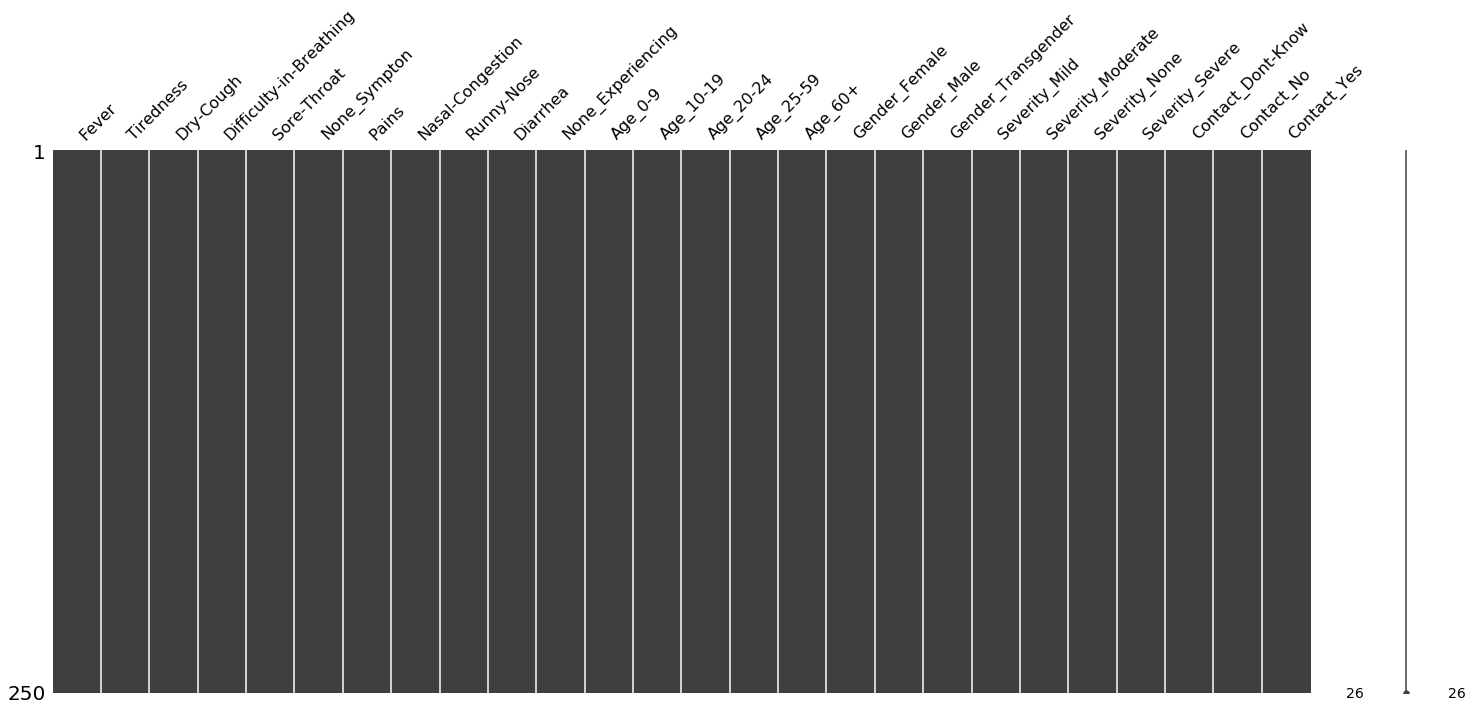

In [47]:
msno.matrix(df)

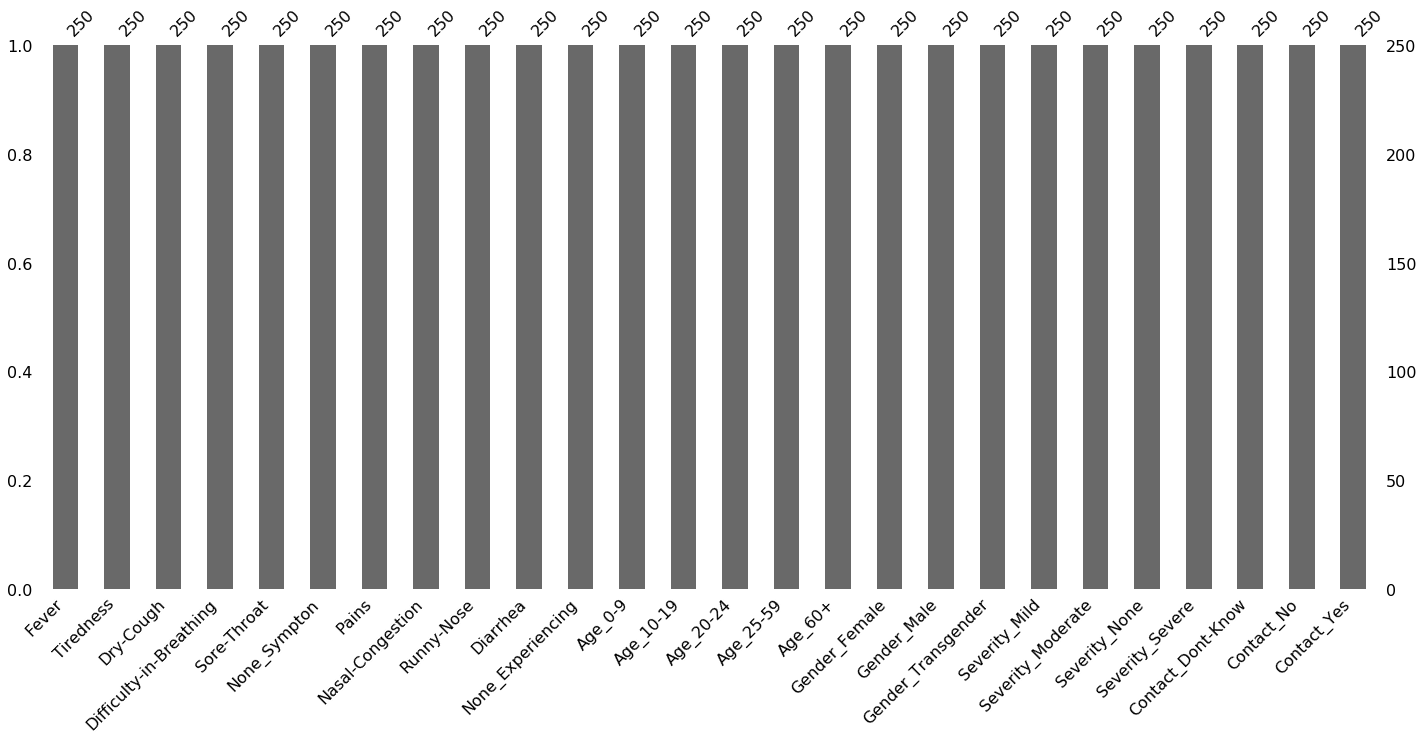

In [48]:
msno.bar(df)

In [49]:
freq_items = apriori(df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 40 combinations | Sampling itemset size 4


,support,itemsets
0,0.300,(Fever)
1,0.488,(Tiredness)
2,0.616,(Dry-Cough)
3,0.500,(Difficulty-in-Breathing)
4,0.304,(Sore-Throat)


In [50]:
freq_items.itemsets.unique()

array([frozenset({'Fever'}), frozenset({'Tiredness'}),
       frozenset({'Dry-Cough'}), frozenset({'Difficulty-in-Breathing'}),
       frozenset({'Sore-Throat'}), frozenset({'Pains'}),
       frozenset({'Nasal-Congestion'}), frozenset({'Runny-Nose'}),
       frozenset({'Diarrhea'}), frozenset({'Age_0-9'}),
       frozenset({'Age_10-19'}), frozenset({'Gender_Female'}),
       frozenset({'Gender_Male'}), frozenset({'Gender_Transgender'}),
       frozenset({'Severity_Mild'}), frozenset({'Severity_None'}),
       frozenset({'Severity_Severe'}), frozenset({'Contact_Dont-Know'}),
       frozenset({'Contact_No'}), frozenset({'Contact_Yes'}),
       frozenset({'Tiredness', 'Fever'}),
       frozenset({'Tiredness', 'Dry-Cough'}),
       frozenset({'Tiredness', 'Difficulty-in-Breathing'}),
       frozenset({'Nasal-Congestion', 'Tiredness'}),
       frozenset({'Tiredness', 'Runny-Nose'}),
       frozenset({'Dry-Cough', 'Difficulty-in-Breathing'}),
       frozenset({'Sore-Throat', 'Dry-Cough'}),
 

In [52]:
rules = association_rules(freq_items, min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fever),(Tiredness),0.300,0.488,0.248,0.826667,1.693989,0.101600,2.953846
1,(Tiredness),(Dry-Cough),0.488,0.616,0.404,0.827869,1.343943,0.103392,2.230857
2,(Dry-Cough),(Tiredness),0.616,0.488,0.404,0.655844,1.343943,0.103392,1.487698
3,(Dry-Cough),(Difficulty-in-Breathing),0.616,0.500,0.392,0.636364,1.272727,0.084000,1.375000
4,(Difficulty-in-Breathing),(Dry-Cough),0.500,0.616,0.392,0.784000,1.272727,0.084000,1.777778
